<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSEZ LES VENTES D'UNE LIBRAIRIE</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [53]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importation de la librairie plotly express
import plotly.express as px
import scipy.stats as stats


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [54]:
#Importation du fichier customer.csv
df_customer = pd.read_csv(r'C:\Openclassroom\Projet 9\Data\customers.csv',delimiter=';')
#Importation du fichier product.csv
df_product = pd.read_csv(r'C:\Openclassroom\Projet 9/Data\products.csv',delimiter=';')
#importation du fichier transaction.csv
df_transaction= pd.read_csv(r'C:\Openclassroom\Projet 9/Data\Transactions.csv',delimiter=';',low_memory= False)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier customer.csv</h3>
</div>

In [55]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_customer.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_customer.shape[1]))

Le tableau comporte 8621 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [56]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_customer.info()
df_customer['birth']=df_customer['birth'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [57]:
#Afficher les 5 premières lignes de la table
df_customer.head(5)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [58]:
#Vérifier si il y a les lignes en doublons dans la colonne client_id
doublons= df_customer.duplicated()
nombre_doublons= doublons.sum()# True = 1, False = 0
print(nombre_doublons)

0


In [59]:
#Afficher les valeurs distinctes de la colonne client_id
df_customer['client_id'].unique()

array(['c_4410', 'c_7839', 'c_1699', ..., 'c_5119', 'c_5643', 'c_84'],
      dtype=object)

In [60]:
#Ajouter age colonne
df_customer['age']=2024 - df_customer['birth']
df_customer

,client_id,sex,birth,age
0,c_4410,f,1967,57
1,c_7839,f,1975,49
2,c_1699,f,1984,40
3,c_5961,f,1962,62
4,c_5320,m,1943,81
...,...,...,...,...
8616,c_7920,m,1956,68
8617,c_7403,f,1970,54
8618,c_5119,m,1974,50
8619,c_5643,f,1968,56


In [61]:
#Vérifier si il y a la valeur manquant
print(df_customer.isnull().sum())

client_id    0
sex          0
birth        0
age          0
dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier product.csv</h3>
</div>


In [62]:
#Dimension du dataset
#Nombre d'observations
#Nombre de caractéristiques
print("Le tableau comporte {} observation(s) ou article(s)".format(df_product.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_product.shape[1]))

Le tableau comporte 3286 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [63]:
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_product.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [64]:
#Vérifier si il y a les lignes en doublons dans la colonne id_prod
doublons= df_product.duplicated()
nombre_doublons_1= doublons.sum()# True = 1, False = 0
print(nombre_doublons_1)

0


In [65]:
#Vérifier si il y a la valeur manquant
print(df_product.isnull().sum())

id_prod    0
price      0
categ      0
dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier transaction.csv</h3>
</div>

In [66]:
#Dimension du dataset
#Nombre d'observations
#Nombre de caractéristiques
print("Le tableau comporte {} observation(s) ou article(s)".format(df_transaction.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_transaction.shape[1]))

Le tableau comporte 1048575 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [67]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
df_transaction.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


In [68]:
#Identifier et compter les doublons
print(df_transaction.duplicated().sum())
#Supprimer les doublons
df_transaction.drop_duplicates(inplace=True)

361040


In [69]:
#Avons-nous des articles sans correspondances?
print('Nombre des articles sans correspondances:',(df_transaction['id_prod'].isnull()).sum())
df_transaction_null=df_transaction[df_transaction['id_prod'].isnull()]
df_transaction_null

Nombre des articles sans correspondances: 1


,id_prod,date,session_id,client_id
687534,NaN,NaN,NaN,NaN


In [70]:
#Supprimer le ligne avec le valeur manquantes:
df_transaction.dropna(inplace=True)
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 26.2+ MB


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_product et df_transaction</h3>
</div>

In [71]:
df_product.loc[:,'id_prod']= df_product['id_prod'].astype(str)
df_transaction.loc[:,'id_prod']= df_transaction['id_prod'].astype(str)
df_transaction.loc[:,'client_id']= df_transaction['client_id'].astype(str)
df_customer.loc[:,'client_id']= df_customer['client_id'].astype(str)
df_transaction['date']= pd.to_datetime(df_transaction['date'])

In [72]:
#Fusion des fichiers df_product et df_transaction   
df_merge= df_product.merge(df_transaction,on= 'id_prod')
df_merge

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533
1,0_1421,19.99,0,2021-03-01 13:48:20.214075,s_285,c_5299
2,0_1421,19.99,0,2021-03-01 15:07:42.730079,s_317,c_8024
3,0_1421,19.99,0,2021-03-02 03:39:21.811833,s_563,c_7702
4,0_1421,19.99,0,2021-03-02 19:09:41.789425,s_850,c_4057
...,...,...,...,...,...,...
687529,1_140,38.56,1,2022-12-09 14:20:34.169187,s_309513,c_7406
687530,0_1920,25.16,0,2021-04-13 18:36:10.252971,s_20115,c_7088
687531,0_1920,25.16,0,2021-05-30 02:37:22.371278,s_41465,c_7748
687532,0_1920,25.16,0,2022-12-30 02:37:22.371278,s_319303,c_7748


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_customer</h3>
</div>

In [73]:
#Fusionnez les datasets df_merge et df_web
df=df_customer.merge(df_merge,on='client_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   client_id   687534 non-null  object        
 1   sex         687534 non-null  object        
 2   birth       687534 non-null  int64         
 3   age         687534 non-null  int64         
 4   id_prod     687534 non-null  object        
 5   price       687534 non-null  float64       
 6   categ       687534 non-null  int64         
 7   date        687534 non-null  datetime64[ns]
 8   session_id  687534 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 47.2+ MB


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse du chiffre d'affaires
</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1 - Chiffre d'affaire par mois 
- Analyse de la tendence de chiffre d'affaire avec la moyenne mobile</h3>
</div>

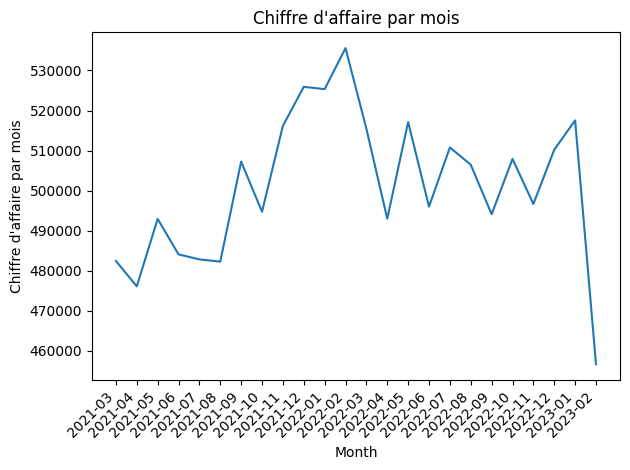

In [74]:

#Chiffre d'affaire par mois
df['month'] = df['date'].dt.to_period('M')
df['month']=df['month'].astype(str)
df_month = df.groupby('month')['price'].sum().reset_index(name='Chiffre d\'affaire par mois')
df_month.head()
#Line chart
plt.plot(df_month['month'],df_month['Chiffre d\'affaire par mois'])
plt.xlabel('Month')
plt.ylabel('Chiffre d\'affaire par mois')
plt.title('Chiffre d\'affaire par mois')
plt.xticks(rotation=45, ha='right')
# Ajuster les marges pour éviter le chevauchement
plt.tight_layout()
plt.show()



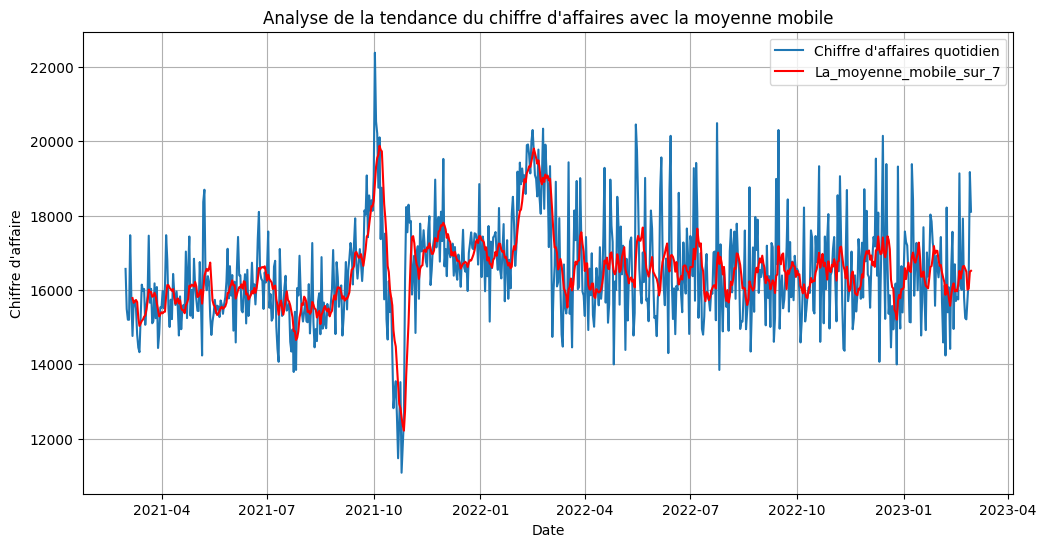

In [75]:
# Calcul du chiffre d'affaires quotidient:
quotidient_ca = df.groupby(df['date'].dt.date)['price'].sum().reset_index(name='jour_ca')
# Calculer la moyenne mobile sur 7 jours pour lisser les données
quotidient_ca['La_moyenne_mobile_sur_7'] = quotidient_ca['jour_ca'].rolling(window=7).mean()
# Chart
plt.figure(figsize=(12, 6))
plt.plot(quotidient_ca['date'], quotidient_ca['jour_ca'], label='Chiffre d\'affaires quotidien')
plt.plot(quotidient_ca['date'], quotidient_ca['La_moyenne_mobile_sur_7'], label='La_moyenne_mobile_sur_7', color='red')
plt.title('Analyse de la tendance du chiffre d\'affaires avec la moyenne mobile')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaire')
plt.legend()
plt.grid(True)
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2 - Chiffre d’affaires par catégorie</h3>
</div>

In [76]:
df_categ=df.groupby('categ')['price'].sum().reset_index(name='CA')
df_categ.head()

,categ,CA
0,0,4419730.97
1,1,4827657.11
2,2,2780275.02


Text(0.5, 1.0, 'Chiffre d’affaires par catégorie de produits')

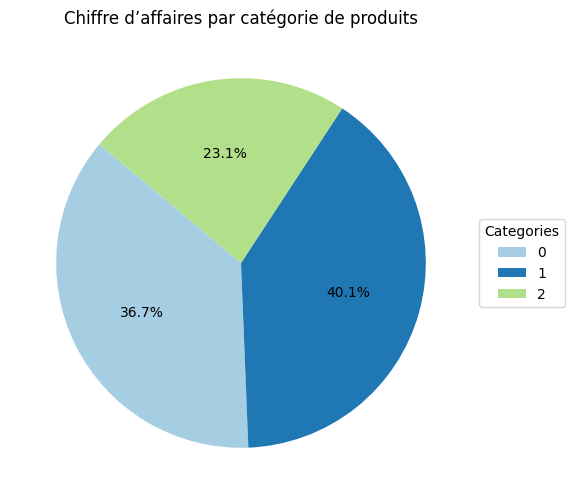

In [77]:
# Create the pie chart
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(df_categ['CA'],autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add a legend with the categories
plt.legend(wedges, df_categ['categ'], title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add a title
plt.title('Chiffre d’affaires par catégorie de produits')

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2.1 - Chiffre d'affaire et transactions par clients
- La courbe de Lorenz
</h3>
</div>

Bar chart CA par categorie

In [78]:
#Calcul le chiffre d'affaire par clients
df_ca=df.groupby('client_id').agg(CA_par_clients=('price','sum'), #Calcul total CA par client
                            Nombre_transaction=('session_id','nunique')).reset_index() #Calcul nombre transaction par client
df_ca['CA_par_clients']=df_ca['CA_par_clients'].round(2)
df_ca= df_ca.sort_values('CA_par_clients',ascending= False).reset_index(drop=True)
df_ca_10=df_ca.head(10)
df_ca_10



,client_id,CA_par_clients,Nombre_transaction
0,c_1609,326039.89,10997
1,c_4958,290227.03,3851
2,c_6714,153918.60,2620
3,c_3454,114110.57,5571
4,c_1570,5285.82,159
5,c_3263,5276.87,143
6,c_2140,5260.18,147
7,c_2899,5214.05,69
8,c_7319,5155.77,145
9,c_7959,5135.75,148


In [79]:
#Bar chart Top 10 clients en CA
fig=px.bar(df_ca_10, x='client_id',y='CA_par_clients',text_auto=True,title='Top 10 clients en chiffre d\'affaire')
fig.show()

In [80]:
#Bar chart Top 10 clients en nombre de transactions
df_session=df_ca.sort_values('Nombre_transaction',ascending= False).reset_index(drop=True)
df_session_10= df_session.head(10)
fig=px.bar(df_session_10, x='client_id',y='Nombre_transaction',text='Nombre_transaction',title='Top 10 clients en nombre de transactions',color_discrete_sequence= ['green'])
fig.show()

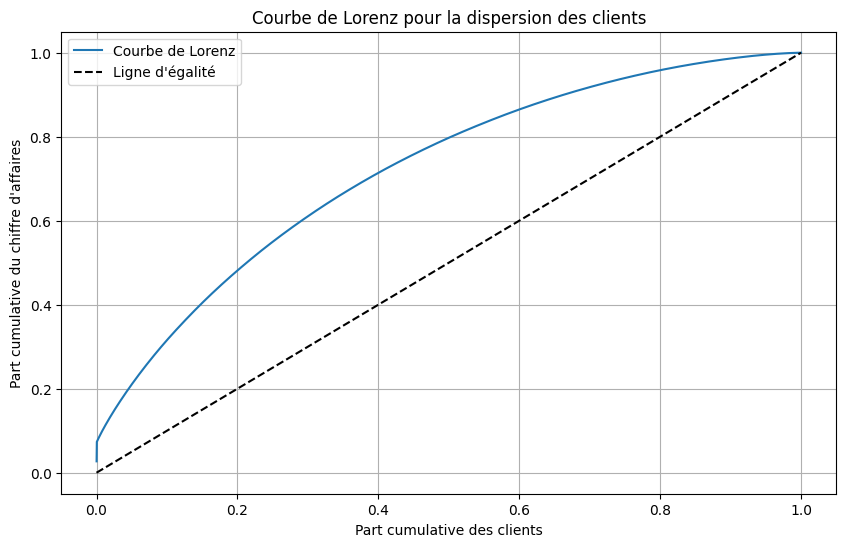

In [81]:
# Calculer la part cumulative du chiffre d'affaires et du nombre de clients

df_ca['cumulative_ca'] = df_ca['CA_par_clients'].cumsum() / df_ca['CA_par_clients'].sum()
df_ca['cumulative_clients'] = (df_ca.index + 1) / df_ca.shape[0]

# Tracer la courbe de Lorenz
plt.figure(figsize=(10, 6))
plt.plot(df_ca['cumulative_clients'],df_ca['cumulative_ca'], label='Courbe de Lorenz')
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Ligne d\'égalité')

plt.title('Courbe de Lorenz pour la dispersion des clients')
plt.xlabel('Part cumulative des clients')
plt.ylabel('Part cumulative du chiffre d\'affaires')
plt.legend()
plt.grid(True)
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.3 - Nombre de clients par mois</h3>
</div>

In [82]:
df_clients= df.groupby('month')['client_id'].nunique().reset_index(name='nombre_client')
df_clients.head()
# Create the line  chart
fig= px.line(df_clients,x='month',y='nombre_client',title='Nombre de clients par mois',facet_row_spacing= 0.05)
fig.update_layout(xaxis_tickangle=-45)
# Définir manuellement la plage de l'axe des y si nécessaire
fig.update_yaxes(range=[5500, 6300])  
# Facultatif : ajouter des marqueurs à chaque point de données pour plus de clarté
fig.update_traces(mode="lines+markers")

# Afficher le graphique
fig.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.4 - Nombre de transaction</h3>
</div>

In [83]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_trans=df.groupby('month')['session_id'].nunique().reset_index(name='Nombre_transaction')
df_trans
# Create the line  chart
fig= px.line(df_trans,x='month',y='Nombre_transaction',title='Nombre de transaction par mois',facet_row_spacing= 0.05)
fig.update_layout(xaxis_tickangle=-45)
# Définir manuellement la plage de l'axe des y 
fig.update_yaxes(range=[12500, 16000])  
# Facultatif : ajouter des marqueurs à chaque point de données pour plus de clarté
fig.update_traces(mode="lines+markers")

# Afficher le graphique
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.5 - Nombre de produits vendus</h3>
</div>

In [84]:
df_pro=df.groupby('id_prod')['session_id'].count().reset_index(name='Nombre_de_produits')
#Top 20 produits les plus vendus
df_pro=df_pro.sort_values('Nombre_de_produits',ascending= False).reset_index(drop=True)
df_pro_top=df_pro.head(20)
fig=px.bar(df_pro_top,x='id_prod',y='Nombre_de_produits',text='Nombre_de_produits',title='Top 20 produits les plus vendus')
fig.update_traces(marker_color='green',textposition='inside')
fig.show()

In [85]:

df_pro=df_pro.sort_values(['Nombre_de_produits'],ascending= [True]).reset_index(drop=True)
df_pro_flops=df_pro.head(20)
fig=px.bar(df_pro_flops,x='id_prod',y='Nombre_de_produits',text='Nombre_de_produits',title='Top 20 produits les moins vendus')
fig.update_traces(marker_color='green',textposition='inside')
fig.show()

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse le comportement de nos clients  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 5.1 - Le lien entre le genre d'un client et les catégories des livres achetés</h3>
</div>

In [86]:
BtoB= ('c_1609','c_4958','c_6714','c_3454')
df_final=df[~df['client_id'].isin(BtoB)].copy()
df_final
df_final.head()

,client_id,sex,birth,age,id_prod,price,categ,date,session_id,month
0,c_4410,f,1967,57,1_385,25.99,1,2021-03-22 01:40:22.782925,s_9707,2021-03
1,c_4410,f,1967,57,1_385,25.99,1,2023-02-22 01:40:22.782925,s_345108,2023-02
2,c_4410,f,1967,57,0_1110,4.71,0,2021-11-04 16:28:30.169021,s_114715,2021-11
3,c_4410,f,1967,57,0_1111,19.99,0,2021-03-22 01:27:49.480137,s_9707,2021-03
4,c_4410,f,1967,57,0_1111,19.99,0,2023-02-22 01:27:49.480137,s_345108,2023-02


In [87]:
# Calcule le nombre de livre par genre et categorie
contingency_table=pd.crosstab(df_final["sex"],df_final['categ'])
contingency_table

categ,0,1,2
sex,,,
f,200793,115721,16980
m,186488,104884,15868


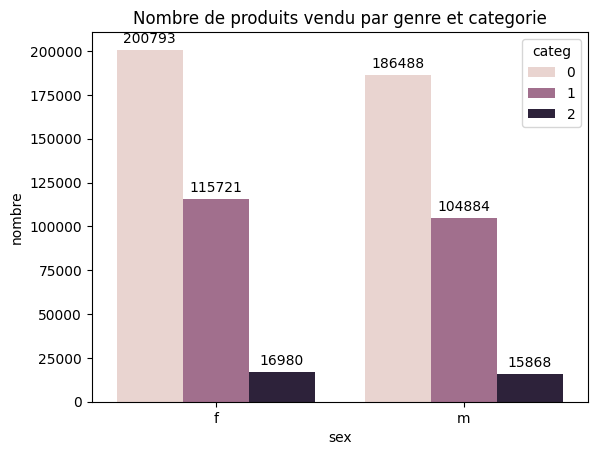

In [88]:
df_final["nombre"]= 1
ax= sns.barplot(data=df_final,x='sex',y='nombre',hue='categ',estimator= 'sum')
plt.title('Nombre de produits vendu par genre et categorie')
# Ajouter les valeurs sur les barres
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type="edge", padding=3)

Conditionn chosissez le test:

_ Les deux variables catégories

_ Les observation sont indépendantes

_ Les échantilllons sont grands

_ Les données sont sous forme de taleaux de contigence 2X3

=> Test Chi2
    Ho: Il n'y a pas de relation entre les variables sex et categ (elles sont indépendantes)
    
    p < 0.05: reject Ho

In [89]:
# H0: les catégories des livres achetés est indépendante du genre d'un client
# H1: les catégories des livres achetés dépend du genre d'un client

from scipy.stats import chi2_contingency
chi2_stat, p_value, dof, expected= chi2_contingency(contingency_table)
print(f'Statistique Chi- 2: {chi2_stat}')
print(f'Valeur p:{p_value}')
print(f'Degrés de liberté:{dof}')
print('Fréquences attendus:')
print(expected)


Statistique Chi- 2: 22.66856665178056
Valeur p:1.1955928116587024e-05
Degrés de liberté:2
Fréquences attendus:
[[201574.89662481 114822.13191434  17096.97146086]
 [185706.10337519 105782.86808566  15751.02853914]]


Chi 2: 22.67 indique une grande différence entre les fréquences observeées et attendues sont suffisamment grandes por qu'elles ne soient pas dues au hasard.

p= 1.1955928116587024e-05 < 0.05: 

Rejet Ho: il existe une relation significative entre le sexe et la catégorie. Le sexe influence significativement le répartition entre les catégories.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 5.2 - Le lien entre l'âge des clientes avec la montant total des achats
</h3>
</div>

In [90]:
# Calcule le montant total des achats par l'âge des clients
achats_par_age= df_final.groupby('age')['price'].sum().reset_index(name= 'Montant total des achats')
#Calcul la fréquence d'achat par age
achats_par_age['Frequence']=df_final.groupby('age')['session_id'].nunique().values
# Calcul la taille du panier moyen par age
achats_par_age['Taille_panier']=achats_par_age['Montant total des achats']/achats_par_age['Frequence']
achats_par_age

,age,Montant total des achats,Frequence,Taille_panier
0,20,616418.15,8756,70.399515
1,21,180680.89,2615,69.094031
2,22,186791.83,2666,70.064452
3,23,181233.57,2488,72.843075
4,24,167388.08,2476,67.604233
...,...,...,...,...
71,91,5477.83,237,23.113207
72,92,5059.18,207,24.440483
73,93,2815.45,96,29.327604
74,94,4251.22,151,28.153775


In [91]:
# Extraire l'âge des clients, la montant total des achats,frequence, taille_panier
age=achats_par_age['age']
montant_achat= achats_par_age['Montant total des achats']
frequence_achat=achats_par_age['Frequence']
taille_panier= achats_par_age['Taille_panier']

### 5.2.1 Vérifier si la variable: 'âge' suit une distribution normale

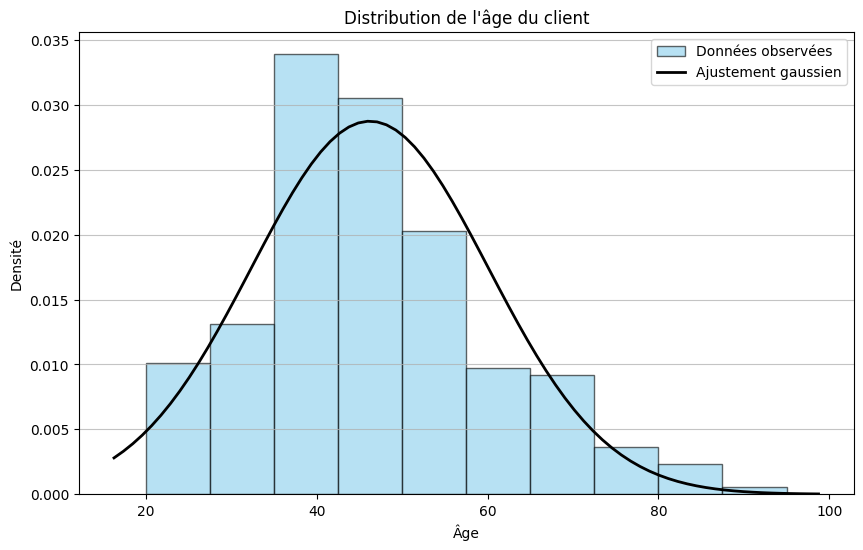

Statistique de Kolmogorov-Smirnov : 0.0638004630812204
P-valeur du test KS : 0.8968673444312906
Les données suivent une distribution normale (on ne rejette pas H0).


In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro

# Vérifier que 'age' est bien une série de données sans valeurs NaN
age_test = df_final['age'].dropna()

# Visualisation de la distribution de l'âge
plt.figure(figsize=(10, 6))
plt.hist(age_test, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6, label="Données observées")

# Ajustement à une loi normale (Gaussienne)
mu, std = norm.fit(age_test)  # Moyenne et écart-type
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(age))
p = norm.pdf(x, mu, std)

# Tracer la courbe de densité normale
plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

# Ajouter les labels et le titre
plt.legend()
plt.title("Distribution de l'âge du client")
plt.xlabel("Âge")
plt.ylabel("Densité")
plt.grid(axis='y', alpha=0.75)

# Afficher le graphique
plt.show()

from scipy.stats import kstest

# Test de normalité avec Kolmogorov-Smirnov
mu, std = norm.fit(age)  # Moyenne et écart-type pour ajustement gaussien
stat_ks, p_value_ks = kstest(age, 'norm', args=(mu, std))

print(f"Statistique de Kolmogorov-Smirnov : {stat_ks}")
print(f"P-valeur du test KS : {p_value_ks}")

#Interprétation des résultats
alpha = 0.05
if p_value_ks > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0).")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0).")


### 5.2.2 Vérifier si la variable: 'montant_achat' suit une distribution normale

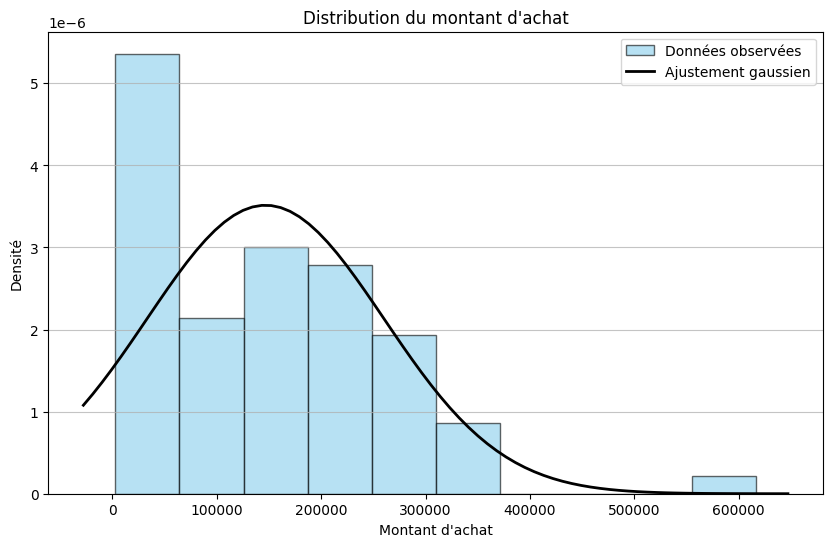

Statistique de Kolmogorov-Smirnov : 0.11432119335378355
P-valeur du test KS : 0.25367941873971733
Les données suivent une distribution normale (on ne rejette pas H0).


In [93]:

# Visualisation de la distribution du montant d'achat
plt.figure(figsize=(10, 6))
plt.hist(montant_achat, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6, label="Données observées")

# Ajustement à une loi normale (Gaussienne)
mu, std = norm.fit(montant_achat)  # Moyenne et écart-type
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(age))
p = norm.pdf(x, mu, std)

# Tracer la courbe de densité normale
plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

# Ajouter les labels et le titre
plt.legend()
plt.title("Distribution du montant d'achat")
plt.xlabel("Montant d'achat")
plt.ylabel("Densité")
plt.grid(axis='y', alpha=0.75)

# Afficher le graphique
plt.show()

# Test de normalité avec Kolmogorov-Smirnov
mu, std = norm.fit(montant_achat)  # Moyenne et écart-type pour ajustement gaussien
stat_ks, p_value_ks = kstest(montant_achat, 'norm', args=(mu, std))

print(f"Statistique de Kolmogorov-Smirnov : {stat_ks}")
print(f"P-valeur du test KS : {p_value_ks}")

#Interprétation des résultats
alpha = 0.05
if p_value_ks > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0).")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0).")


<Axes: xlabel='age', ylabel='Montant total des achats'>

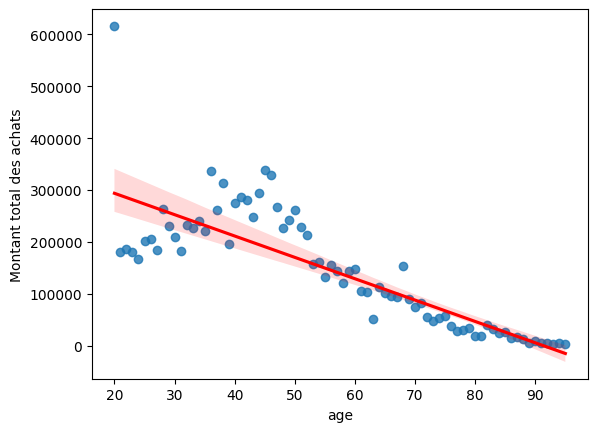

In [94]:
# Visualisation de le tendance
sns.regplot(x=age, y=montant_achat, robust= True, line_kws= dict(color= "r"))

Les condition pour choisir le test: 

    -Les variables sont quantitatives.

    -Les données sont indépendantes.

    -L'âge et le montant des achats suivent  distribution normale.

    -La relation entre les variables est linéaire.

Donc, on choisi le test de corrélations de Pearson

In [95]:
# Calculer le coefficient de corrélation de Pearson et la valeur p:
from scipy.stats import pearsonr
correlation,p_value= pearsonr(age,montant_achat)

print(f'Coefficient de corrélation de Pearson:{correlation}')
print(f'Valeur p :{p_value}')

Coefficient de corrélation de Pearson:-0.830633932201681
Valeur p :1.6855748470136195e-20


Coefficient de corrélation de Pearson (r): Le coefficient de corrélation de -0.83 indique une très forts corrélation negatif entre l'âge des clients et la montant total des achats. Cela signifie qu'à measure que l'âge augmentente, le montant des achats diminue. 

Valeur p: La valeur p de 1.6855748470136195e-20 est inférieure au seuil de 0,05 indiquant que la corrélation est statistiquement significative. La relation observéé n'est donc pas due au simple hasard.



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 5.3- Le lien entre l'âge des clientes avec la fréquence d'achat
</h3>
</div>

Coefficient de corrélation de Pearson:-0.6043783077705711
Valeur p :7.427314616323586e-09


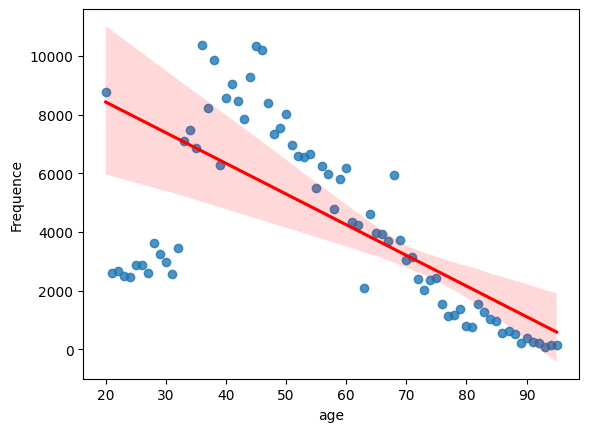

In [96]:
#Visualisation de la tendance
sns.regplot(x=age, y= frequence_achat, robust= True, line_kws= dict(color="r"))

# Calculer le coefficient de corrélation de Pearson et la valeur p:
from scipy.stats import pearsonr
correlation,p_value= pearsonr(age,frequence_achat)

print(f'Coefficient de corrélation de Pearson:{correlation}')
print(f'Valeur p :{p_value}')

Coefficient de corrélation de Pearson (r): Le coefficient de corrélation de -0.604 indique un corrélation moyenne negatif entre l'âge des clients et la fréquence d'achat. Cela signifie qu'à measure que l'âge augmentente, la fréquence d'achat diminue. 

Valeur p: La valeur p de 7.427314616323586e-09 est inférieure au seuil de 0,05 indiquant que la corrélation est statistiquement significative. La relation observéé n'est donc pas due au simple hasard.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 5.4- Le lien entre l'âge des clientes avec la taille du panier moyen
</h3>
</div>

### 5.4.1 Vérifier si la variable: 'la taille du panier' suive une distribution normale

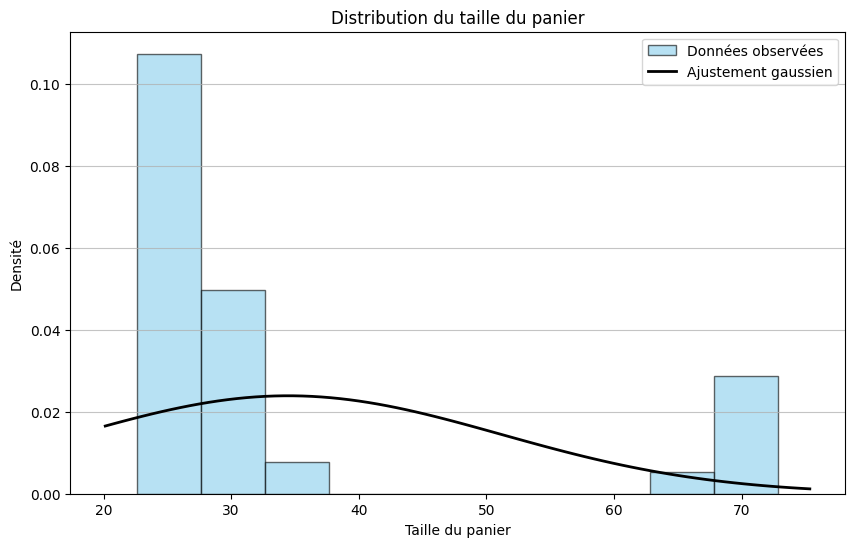

Statistique de Kolmogorov-Smirnov : 0.36017618628562814
P-valeur du test KS : 2.45676079427084e-09
Les données ne suivent pas une distribution normale (on rejette H0).


In [97]:

# Visualisation de la distribution du montant d'achat
plt.figure(figsize=(10, 6))
plt.hist(taille_panier, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6, label="Données observées")

# Ajustement à une loi normale (Gaussienne)
mu, std = norm.fit(taille_panier)  # Moyenne et écart-type
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(taille_panier))
p = norm.pdf(x, mu, std)

# Tracer la courbe de densité normale
plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

# Ajouter les labels et le titre
plt.legend()
plt.title("Distribution du taille du panier")
plt.xlabel("Taille du panier")
plt.ylabel("Densité")
plt.grid(axis='y', alpha=0.75)

# Afficher le graphique
plt.show()

# Test de normalité avec Kolmogorov-Smirnov
mu, std = norm.fit(taille_panier)  # Moyenne et écart-type pour ajustement gaussien
stat_ks, p_value_ks = kstest(taille_panier, 'norm', args=(mu, std))

print(f"Statistique de Kolmogorov-Smirnov : {stat_ks}")
print(f"P-valeur du test KS : {p_value_ks}")

#Interprétation des résultats
alpha = 0.05
if p_value_ks > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0).")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0).")


<Axes: xlabel='age', ylabel='Taille_panier'>

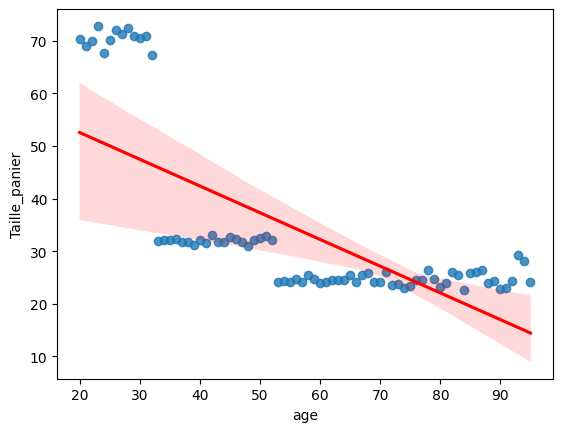

In [98]:
#Visualisation de tendance:
sns.regplot(x=age, y= taille_panier, robust= True, line_kws= dict(color="r"))

Les condition pour choisir le test: 

    -Les variables sont quantitatives.

    -Les données sont indépendantes.

    -Le taille du panier ne suive pas une distribution normale.

    -La relation entre les variables est monotone.

Donc, on choisi le test de corrélations de Spearman

In [99]:

from scipy.stats import spearmanr

#Calculer le coefficient de corrélation de Pearson et la p-valeur
corr, p_value= spearmanr (achats_par_age['age'],achats_par_age['Taille_panier'])
print(f'Coefficient de corrélation de Pearson:{corr}')
print(f'p_value:{p_value}')

Coefficient de corrélation de Pearson:-0.7824196855775802
p_value:7.049554602185417e-17


Coefficient de corrélation de Pearson (r): Le coefficient de corrélation de -0.747 indique un corrélation moyenne negatif entre l'âge des clients et la taille moyenne d'achat. Cela signifie qu'à measure que l'âge augmentente, la taille moyenne d'achat diminue. 

Valeur p: La valeur p de 9.160303530539692e-15 est inférieure au seuil de 0,05 indiquant que la corrélation est statistiquement significative. La relation observéé n'est donc pas due au simple hasard.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> 5.5 - Le lien entre l'âge moyen des clientes avec la catégories des livres achetés
</h3>
</div>

### 5.5.1 Vérifier si la variable: 'La catégories des livres achetés ' suive une distribution normale

In [100]:
# Calcul la catégories des livres achetés par âge
age_categ=df_final.groupby(['age','categ'])['id_prod'].count().reset_index(name='Nombre_achats')
age_categ

,age,categ,Nombre_achats
0,20,0,3418
1,20,1,6067
2,20,2,6012
3,21,0,909
4,21,1,1798
...,...,...,...
223,94,1,161
224,94,2,2
225,95,0,78
226,95,1,123


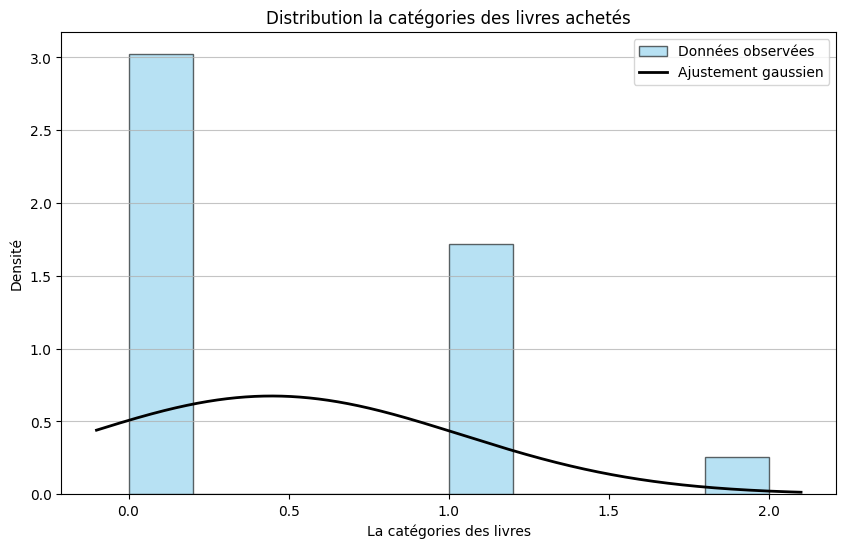

Statistique de Kolmogorov-Smirnov : 0.3794897711286951
P-valeur du test KS : 0.0
Les données ne suivent pas une distribution normale (on rejette H0).


In [101]:
# Vérifier que 'categ' est bien une série de données sans valeurs NaN
categ_test = df_final['categ'].dropna()
# Visualisation de la distribution du montant d'achat
plt.figure(figsize=(10, 6))
plt.hist(categ_test, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.6, label="Données observées")

# Ajustement à une loi normale (Gaussienne)
mu, std = norm.fit(categ_test)  # Moyenne et écart-type
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(categ_test))
p = norm.pdf(x, mu, std)

# Tracer la courbe de densité normale
plt.plot(x, p, 'k', linewidth=2, label="Ajustement gaussien")

# Ajouter les labels et le titre
plt.legend()
plt.title("Distribution la catégories des livres achetés")
plt.xlabel("La catégories des livres")
plt.ylabel("Densité")
plt.grid(axis='y', alpha=0.75)

# Afficher le graphique
plt.show()

# Test de normalité avec Kolmogorov-Smirnov
mu, std = norm.fit(categ_test)  # Moyenne et écart-type pour ajustement gaussien
stat_ks, p_value_ks = kstest(categ_test, 'norm', args=(mu, std))

print(f"Statistique de Kolmogorov-Smirnov : {stat_ks}")
print(f"P-valeur du test KS : {p_value_ks}")

#Interprétation des résultats
alpha = 0.05
if p_value_ks > alpha:
    print("Les données suivent une distribution normale (on ne rejette pas H0).")
else:
    print("Les données ne suivent pas une distribution normale (on rejette H0).")


<Axes: xlabel='categ', ylabel='age'>

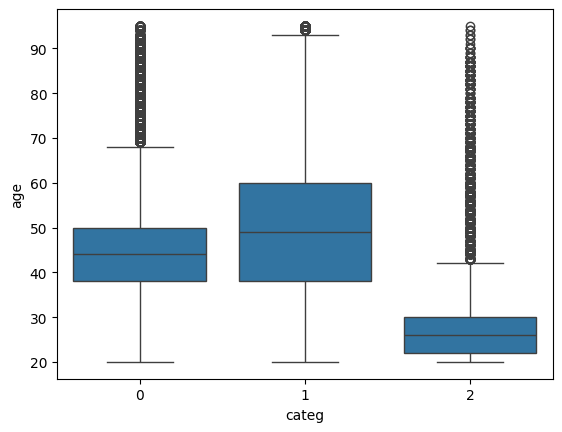

In [102]:
#Visualisez les différences entre les catégories via un boxplot 
sns.boxplot(x="categ",y="age",data=df_final)

Le boxplot permet de clairement voir une différence d'âge pour les différents catégorie.

In [103]:
#Select colonne pertinent pour chaque catégorie du livre
age_categ0= df_final[df_final['categ']== 0]['age']
age_categ1= df_final[df_final['categ']== 1]['age']
age_categ2= df_final[df_final['categ']== 2]['age']
# Print la moyenne de l'age pour chaque catégorie
print('Moyenne age pour la catégorie du livre 0:',round(np.mean(age_categ0)))
print('Moyenne age pour la catégorie du livre 1:',round(np.mean(age_categ1)))
print('Moyenne age pour la catégorie du livre 2:',round(np.mean(age_categ2)))

Moyenne age pour la catégorie du livre 0: 46
Moyenne age pour la catégorie du livre 1: 50
Moyenne age pour la catégorie du livre 2: 28


Les condition pour choisir le test: 

    -Les variables sont quantitatives et quanlitative

    -Les données sont indépendantes.

    -Le catégorie des livres ne suive pas une distribution normale.

    -On compare les moyennes des trois catégories.

Donc, on choisi le test de corrélations de ANOVA

In [104]:
#Calculer la statistique de test ANOVA et la valuer p
from scipy.stats import kruskal
f_stat, p_value = kruskal(age_categ0,age_categ1,age_categ2)

print(f"Statistique de test F: {f_stat}")
print(f"Valeur p: {p_value}")
     

Statistique de test F: 71359.73412120914
Valeur p: 0.0
